In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 
import pandas as pd 
from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

In [7]:
data = xr.open_mfdataset('C:/Users/DELL/Desktop/ir_eland/*.nc')
ireland = data.where(data != -99.0)

In [4]:
ireland_data = ireland.precip
ireland.precip

<xarray.DataArray 'precip' (datetime: 3653, lat: 18, lon: 19)>
dask.array<where, shape=(3653, 18, 19), dtype=float32, chunksize=(366, 18, 19), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 -10.5 -10.25 -10.0 -9.75 ... -6.75 -6.5 -6.25 -6.0
  * lat       (lat) float32 55.75 55.5 55.25 55.0 ... 52.25 52.0 51.75 51.5
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Attributes:
    grid_mapping:  crs

In [5]:
monthly_data = ireland_data.groupby('datetime.month')
yearly_data = ireland_data.groupby('datetime.year')

In [45]:
#Question 1
# monthly rainfall totals
mon_rainfall_totals = monthly_data.sum('datetime')

# monthly climatologies rainfall totals
mon_mean_climo_totals = monthly_data.sum('datetime').mean('month')

In [46]:
#Question 2
# annual totals
annual_totals = yearly_data.sum()

# annual climatology totals
annual_climo_totals = yearly_data.sum('datetime').mean('year')

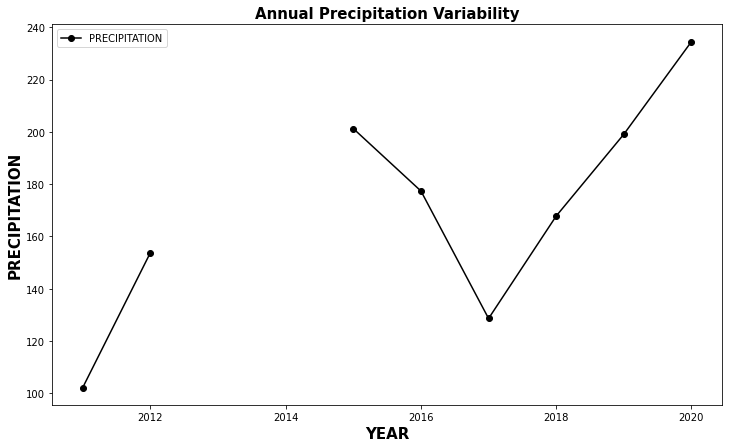

In [47]:
#Question 2
#plotting time series for annual climatologies
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,annual_totals.mean(['lon','lat']),color = 'BLACK', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('Annual Precipitation Variability', fontweight = 'bold', fontsize=15 ,color = 'Black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Black')
plt.legend()
# plt.show()
plt.savefig('1.jpeg');

In [48]:
#Question 3
#DRY days per year
dryDays_per_year = ireland_data.where(ireland_data < 1).groupby('datetime.year').count('datetime')

#WET days per year
wetDays_per_year = ireland_data.where(ireland_data >= 1).groupby('datetime.year').count('datetime')

#DRY days per MONTH
dryDays_per_month = ireland_data.where(ireland_data < 1).groupby('datetime.month').count('datetime')

#WET days per MONTH
wetDays_per_month = ireland_data.where(ireland_data >= 1).groupby('datetime.month').count('datetime')

#Question 4
# Extreme Rainfall >10mm per year
Xrain10 = ireland_data.where(ireland_data > 10).groupby('datetime.year').count('datetime')

# Extreme Rainfall >20mm per year
Xrain20 = ireland_data.where(ireland_data > 20).groupby('datetime.year').count('datetime')

# Extreme Rainfall >10mm per month
Xrain10M = ireland_data.where(ireland_data > 10).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per month
Xrain20M = ireland_data.where(ireland_data > 20).groupby('datetime.month').count('datetime')




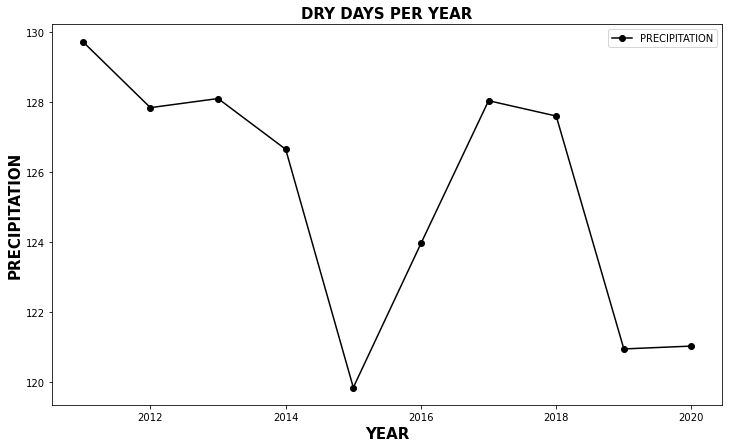

In [49]:
#plotting time series for drydays per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,dryDays_per_year.mean(['lon','lat']),color = 'black', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('DRY DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
# plt.show()
plt.savefig('2.jpeg');

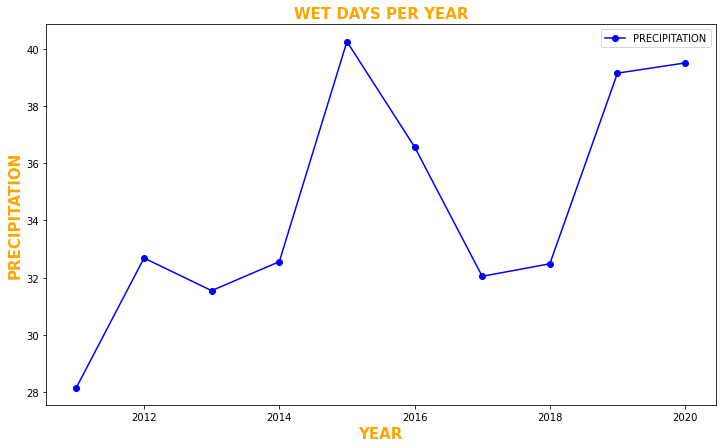

In [50]:
#plotting time series for wetdays per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,wetDays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('WET DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
# plt.show()
plt.savefig('3.jpeg');


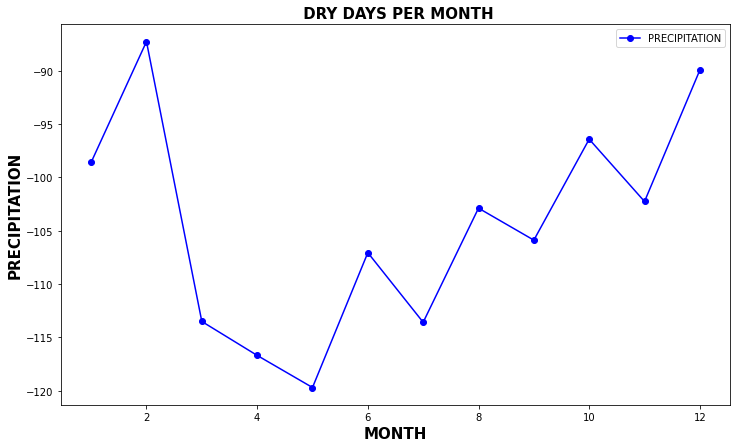

In [51]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,dryDays_per_month.mean(['lon','lat'])*-1,color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title(' DRY DAYS PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'Black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'Black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
# plt.show()
plt.savefig('4.jpeg');

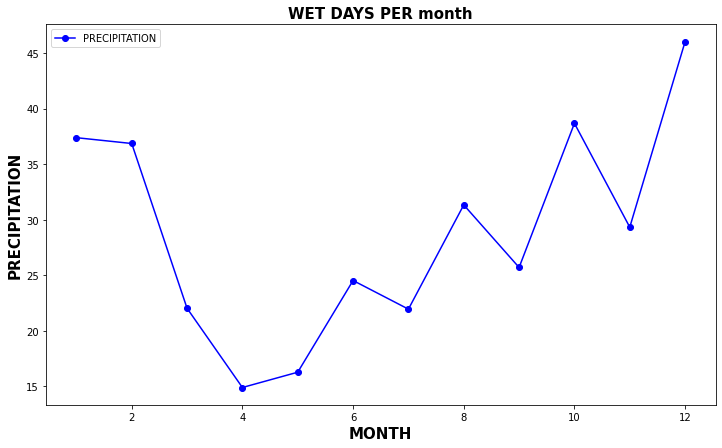

In [52]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,wetDays_per_month.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('WET DAYS PER month', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
# plt.show()
plt.savefig('5.jpeg');

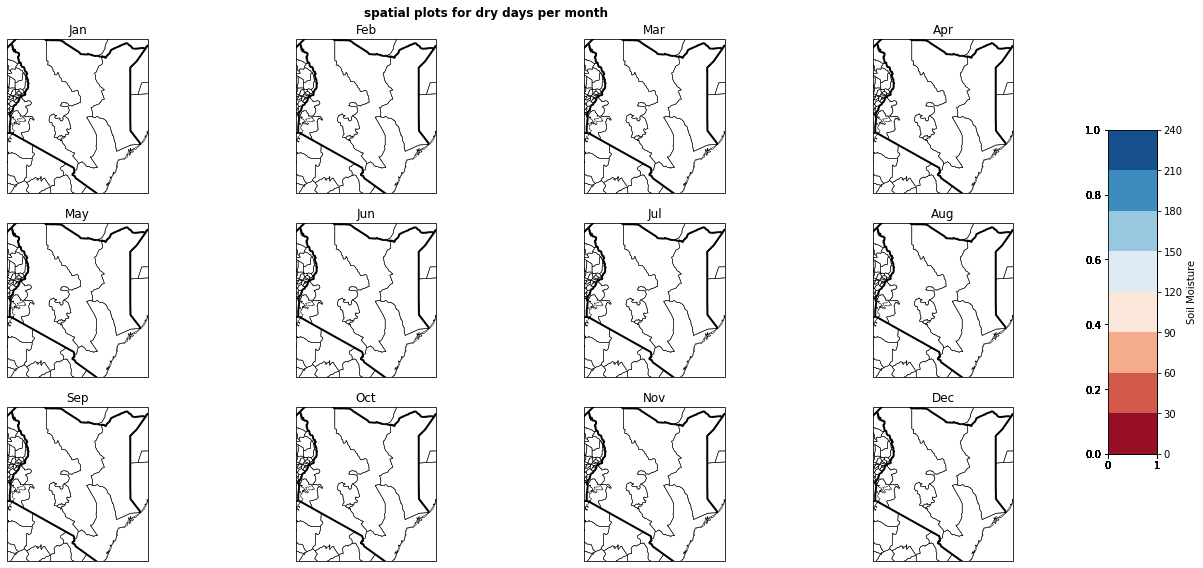

In [25]:
# spatial plots for dry days per month
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([33.75,42.0,4.5,-4.5])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dryDays_per_month.lon, dryDays_per_month.lat, dryDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per month', fontweight='bold');
plt.savefig('6.jpeg');

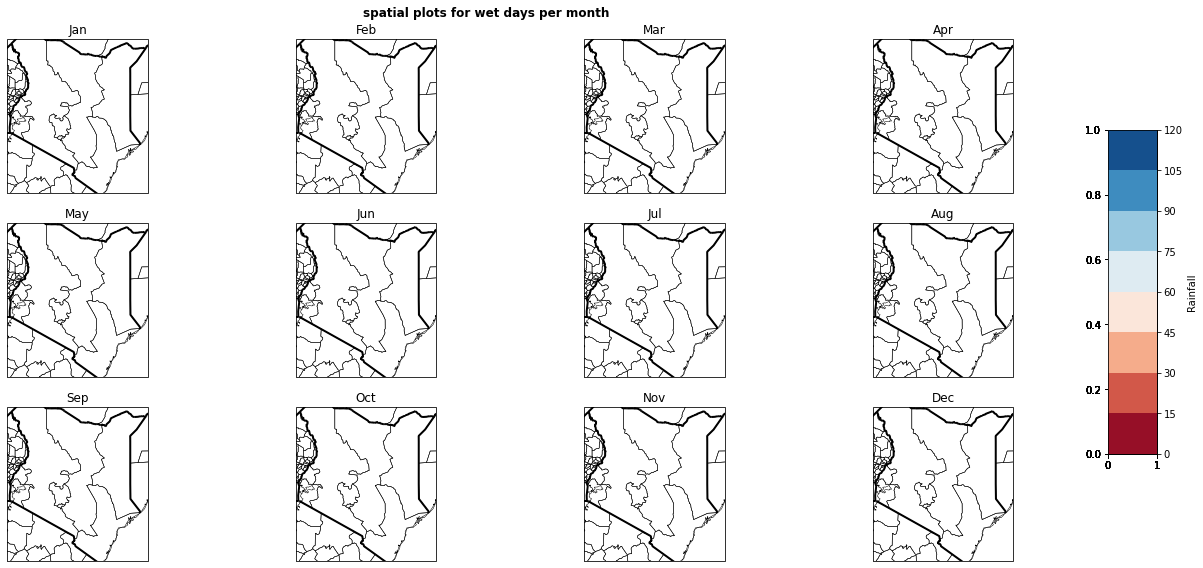

In [26]:
# spatial plots for wet days per month
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([33.75,42.0,4.5,-4.5])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wetDays_per_month.lon, wetDays_per_month.lat, wetDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for wet days per month', fontweight='bold');
plt.savefig('7.jpeg');

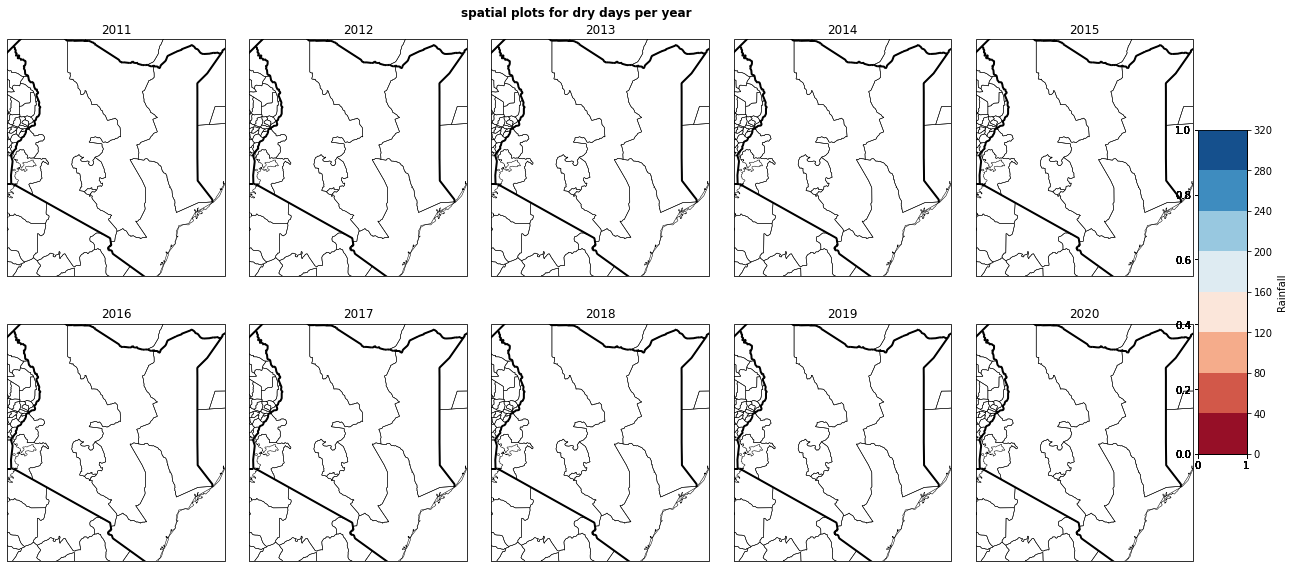

In [27]:
# spatial plots for dry days per year
fig,ax=plt.subplots(2,5,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([33.75,42.0,4.5,-4.5])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(dryDays_per_year.lon, dryDays_per_year.lat, dryDays_per_year[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per year', fontweight='bold');
plt.savefig('8.jpeg');

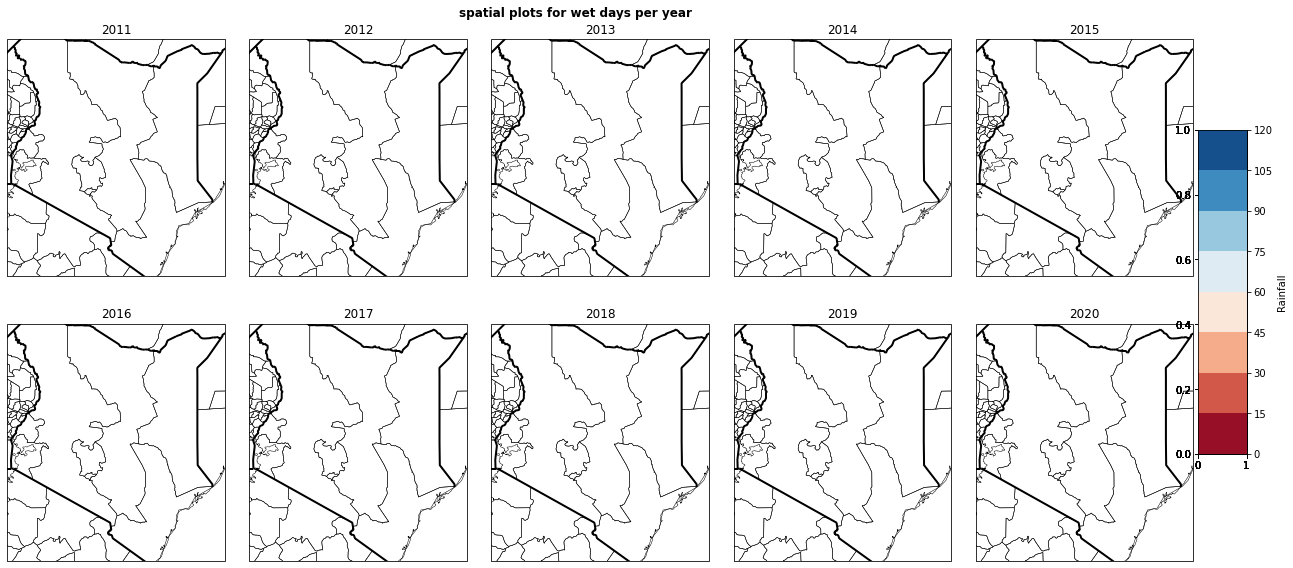

In [28]:
# spatial plots for wet days per year
fig,ax=plt.subplots(2,5,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([33.75,42.0,4.5,-4.5])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(wetDays_per_year.lon, wetDays_per_year.lat, wetDays_per_year[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for wet days per year', fontweight='bold');
plt.savefig('9.jpeg');

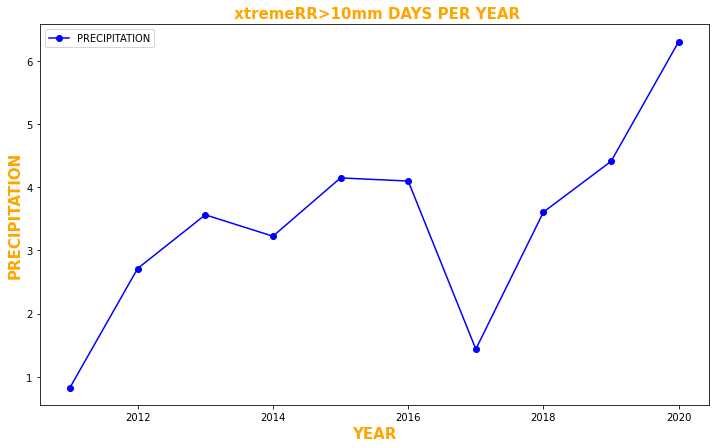

In [29]:
#plotting time series for xtremerr>10mm per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10.year,Xrain10.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title(' xtremeRR>10mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
# plt.show()
plt.savefig('10.jpeg');

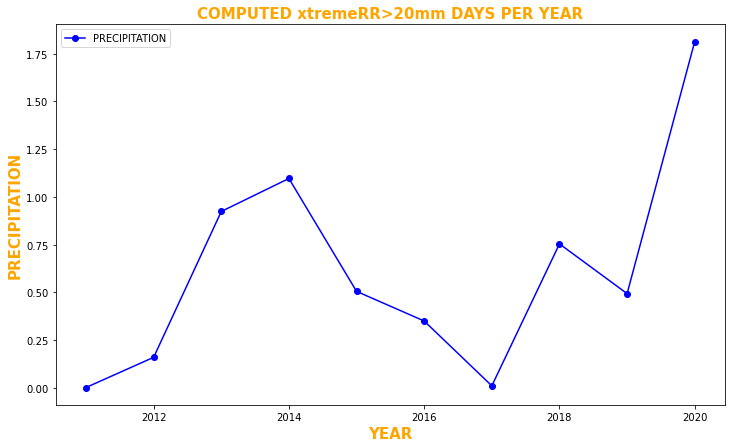

In [30]:
#plotting time series for xtremerr>20mm per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20.year,Xrain20.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('COMPUTED xtremeRR>20mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
# plt.show()
plt.savefig('11.jpeg');

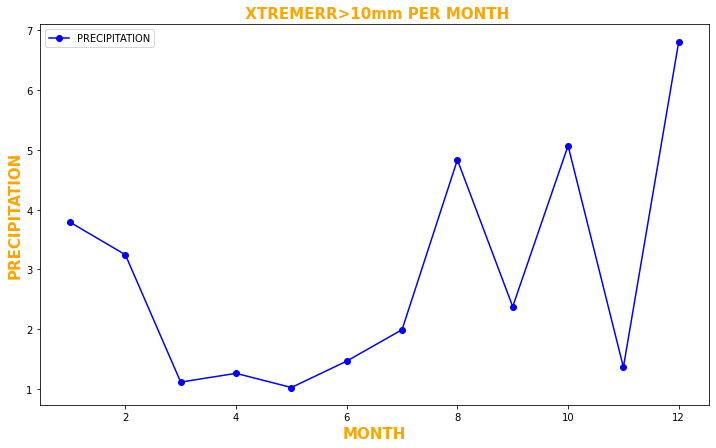

In [31]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10M.month,Xrain10M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title(' XTREMERR>10mm PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
# plt.show()
plt.savefig('12.jpeg');

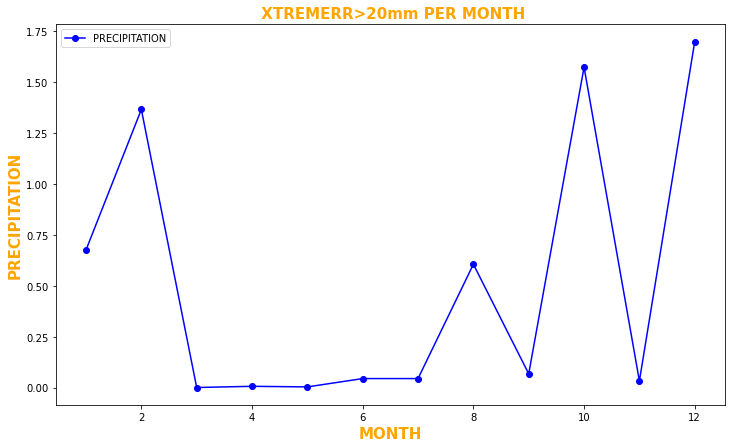

In [32]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20M.month,Xrain20M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title(' XTREMERR>20mm PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
# plt.show()
plt.savefig('13.jpeg');

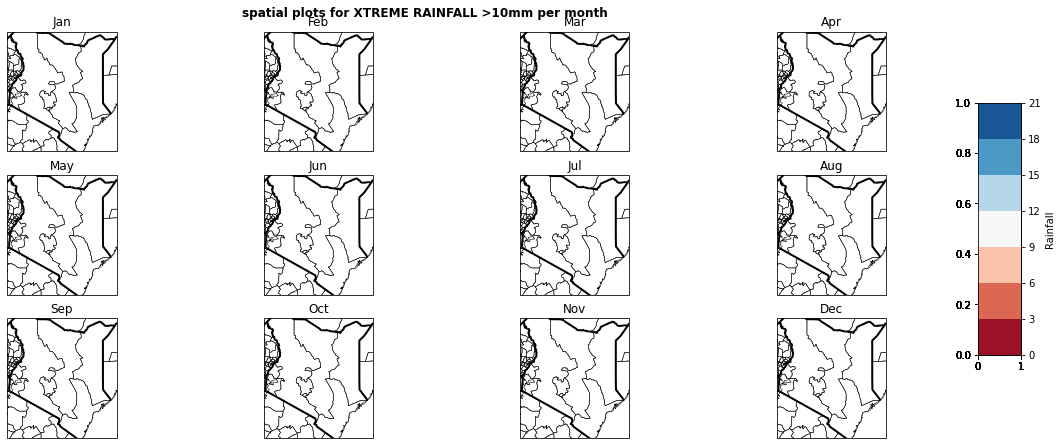

In [33]:
# spatial plots for XTREME RAINFALL >10mm per month
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([33.75,42.0,4.5,-4.5])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain10M.lon, Xrain10M.lat, Xrain10M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for XTREME RAINFALL >10mm per month', fontweight='bold');
plt.savefig('14.jpeg');

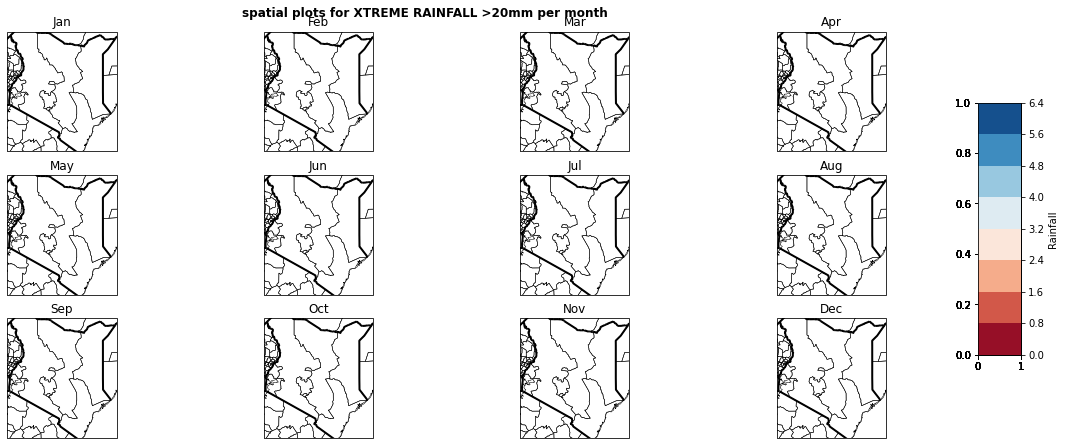

In [35]:
# spatial plots for XTREME RAINFALL >20mm per month
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([33.75,42.0,4.5,-4.5])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain20M.lon, Xrain20M.lat, Xrain20M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for XTREME RAINFALL >20mm per month', fontweight='bold');
plt.savefig('15.jpeg');

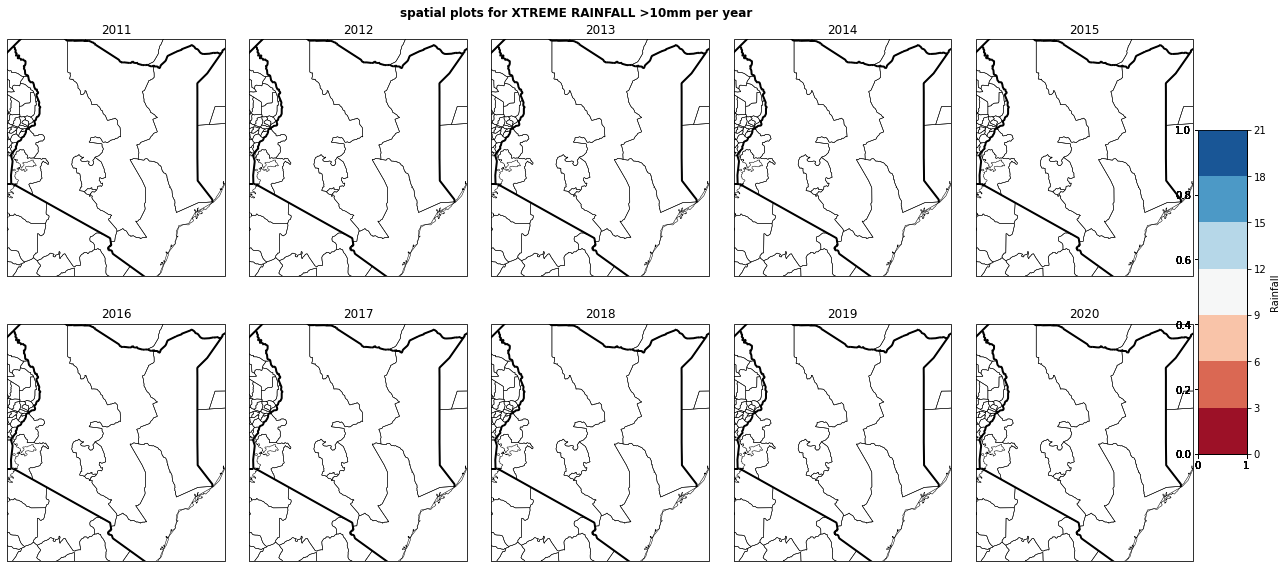

In [36]:
# spatial plots for XTREME RAINFALL >10mm per year
fig,ax=plt.subplots(2,5,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([33.75,42.0,4.5,-4.5])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain10.lon, Xrain10.lat, Xrain10[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for XTREME RAINFALL >10mm per year', fontweight='bold');
plt.savefig('16.jpeg');

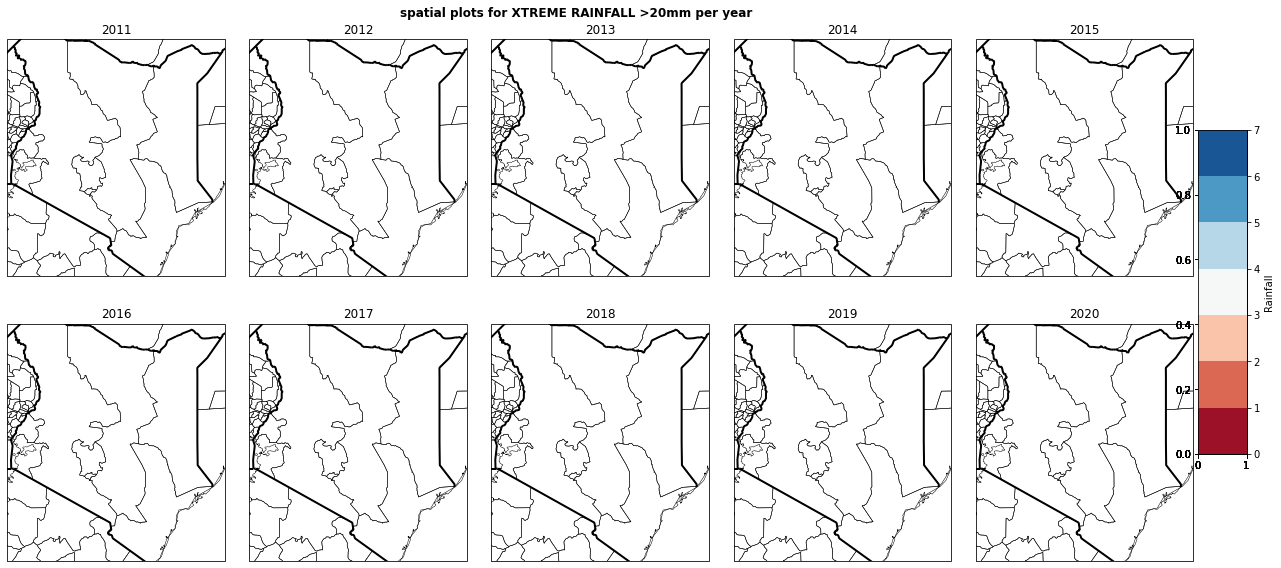

In [37]:
# spatial plots for XTREME RAINFALL >20mm per year
fig,ax=plt.subplots(2,5,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([33.75,42.0,4.5,-4.5])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain20.lon, Xrain20.lat, Xrain20[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for XTREME RAINFALL >20mm per year', fontweight='bold');
plt.savefig('17.jpeg');